In [ ]:
%pip install pyextremes

  Obtaining dependency information for pyextremes from https://files.pythonhosted.org/packages/76/17/f6eb9f3208f94999fa92a019852de27dacee45fd377aac3ef7d576df691a/pyextremes-2.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for emcee<4.0.0,>=3.0.3 from https://files.pythonhosted.org/packages/f9/ef/2196b9bf88ffa1bde45853c72df021fbd07a8fa91a0f59a22d14a050dc04/emcee-3.1.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
   --------------------- ------------------ 30.7/57.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/47.4 kB ? eta -:--:--
   ---------------------------------------- 47.4/47.4 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


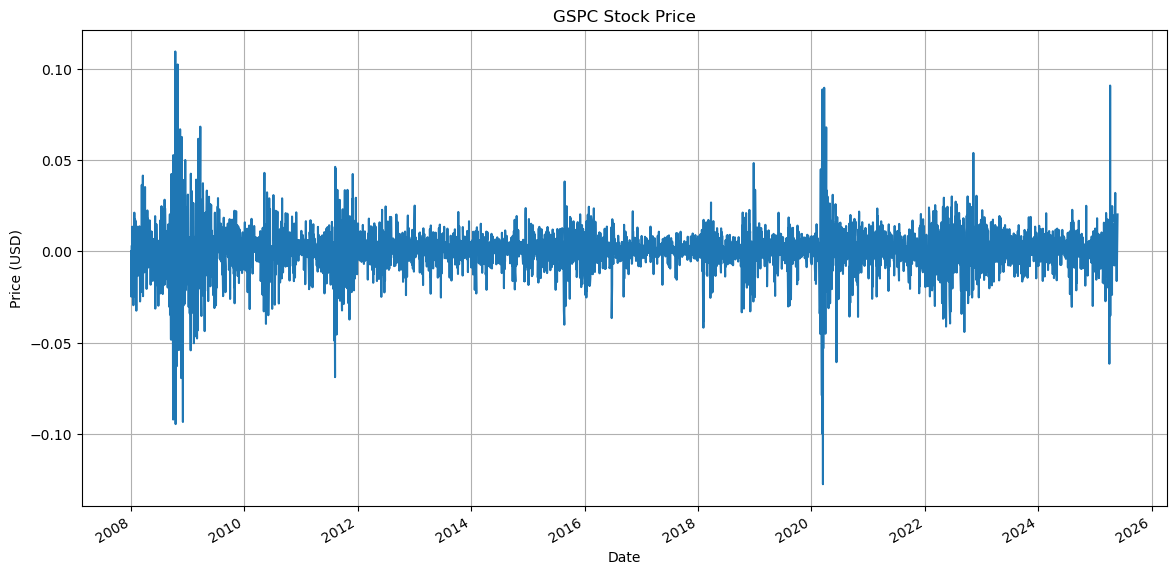

In [13]:
import yfinance as yf
import numpy as np
import pyextremes as pyx
import matplotlib.pyplot as plt

data = yf.download("^GSPC", start="2008-01-01")['Close'] #S&P 500
log_returns = np.log(data / data.shift(1)).dropna()

log_returns['^GSPC'].plot(title='GSPC Stock Price', figsize=(14, 7))
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid()
plt.show()


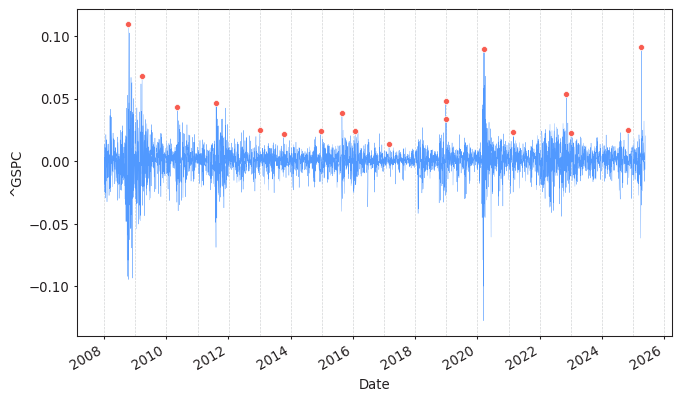

In [ ]:
losses = -log_returns[log_returns < 0] #negative returns values
threshold = np.quantile(losses, 0.95) #0.95th quantile from data, crude
extreme_values = losses[losses > threshold] - threshold

extremes = pyx.get_extremes(log_returns['^GSPC'], "BM")
pyx.plotting.plot_extremes(
    ts=log_returns,
    extremes=extremes,
    extremes_method="BM",
    extremes_type="high",
    block_size="365.2425D" #arbitrary block size of 1 year
)
plt.show()